# Tugas 1

In [1]:
import os
from pathlib import Path

SUB = "lab1"
BASE_DIR = Path(os.path.abspath("")).resolve(strict=True).parent
OUT = os.path.join(BASE_DIR, "out", SUB)
STATIC = os.path.join(BASE_DIR, "static", SUB)

In [43]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import color, exposure, filters, io, morphology, util

## Sunflower

In [3]:
sunflower = io.imread(os.path.join(STATIC, "sunflower.jpg"))

### Histogram

In [4]:
sunflower_hist = util.img_as_ubyte(sunflower)

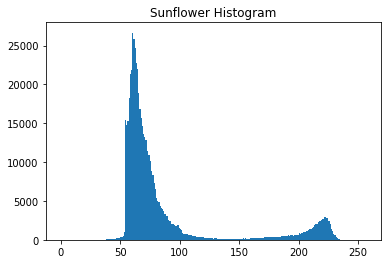

In [5]:
plt.hist(sunflower_hist.flatten(), 256, range=(0, 256))
plt.title("Sunflower Histogram")
plt.show()

### Histogram Equalization

In [6]:
sunflower_histeq = exposure.equalize_hist(sunflower)
sunflower_histeq_hist = util.img_as_ubyte(sunflower_histeq)

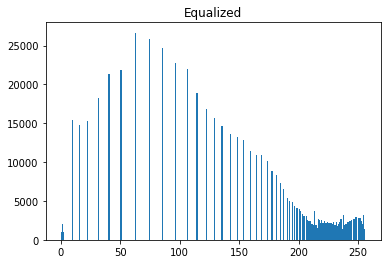

In [7]:
plt.hist(sunflower_histeq_hist.flatten(), 256, range=(0, 256))
plt.title("Equalized")
plt.show()

### Contrast Stretching

In [8]:
sunflower_max_range = max(sunflower.flatten())
sunflower_min_range = min(sunflower.flatten())
b = int(np.floor(255 / (sunflower_max_range - sunflower_min_range)))
sunflower_stretch = (sunflower - sunflower_min_range) * b
sunflower_stretch_hist = util.img_as_ubyte(sunflower_stretch)

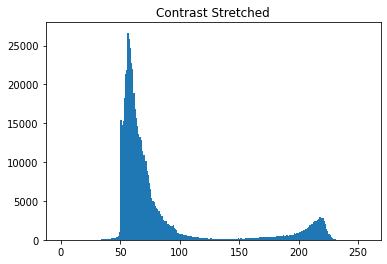

In [9]:
plt.hist(sunflower_stretch_hist.flatten(), 256, range=(0, 256))
plt.title("Contrast Stretched")
plt.show()

### Analisis

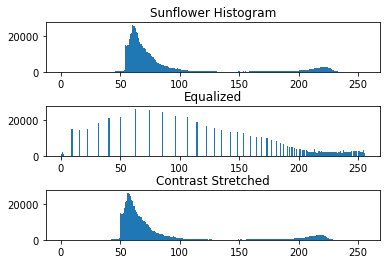

In [12]:
plt.subplot(3, 1, 1)
plt.hist(sunflower_hist.flatten(), 256, range=(0, 256))
plt.title("Sunflower Histogram")
plt.subplot(3, 1, 2)
plt.hist(sunflower_histeq_hist.flatten(), 256, range=(0, 256))
plt.title("Equalized")
plt.subplot(3, 1, 3)
plt.hist(sunflower_stretch_hist.flatten(), 256, range=(0, 256))
plt.title("Contrast Stretched")
plt.subplots_adjust(hspace=0.7)
plt.show()

Hal pertama yang gampang dilihat adalah penyebaran contrast nya. Gambar asli memiliki contrast yang lumayan menyebar, lebih banyak di gelap.

Setelah di apply `Histogram Equalization`, histogram dari gambar sunflower menjadi lebih sparse. Contrast yang awalnya sudah lumayan menyebar sekarang menjadi lebih menyebar lagi. Kita bisa lihat hotspot contrast di range 50-100 penyebarannya sangat sparse. Area 200-230 juga penyebarannya lumayan besar, tetapi tidak sebesar 50-100.

Di lain sisi, histogram gambar yang di apply `Contrast Stretching` tidak jauh beda dengan histogram original. Hasil ini dikarenakan oleh cara contrast stretching bekerja yang sifatnya hanya naive mapping. Kita bisa tarik bahwa di gambar original, ada setidaknya satu pixel dimana tingkat contrast nya sangat rendah dan ada satu pixel lain yang tingkat contrast nya sangat tinggi. Hal tersebut menyebabkan *stretching* yang tidak optimal.

Kita bisa cek minimum dan maximum contrast level dengan cara berikut.

In [20]:
print(f"Sunflower\nMin = {sunflower_max_range}\nMax = {sunflower_min_range}")

Sunflower
Min = 255
Max = 4


Kita bisa lihat dengan value diatas, contrast nya hanya akan di stretch ke bawah (rendah) sebanyak 4 value yang menghasilkan gambar yang hampir identikal dengan yang asli.

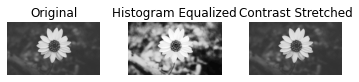

In [19]:
plt.subplot(1, 3, 1)
plt.imshow(sunflower, cmap="gray")
plt.title("Original")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(sunflower_histeq, cmap="gray")
plt.title("Histogram Equalized")
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(sunflower_stretch, cmap="gray")
plt.title("Contrast Stretched")
plt.axis("off")
plt.subplots_adjust(wspace=0.3)
plt.show()

## Iris

In [25]:
iris = io.imread(os.path.join(STATIC, "iris.jpg"))
iris_gray = color.rgb2gray(iris)

### Horizontal Edge

In [26]:
iris_sobel_h = util.img_as_ubyte(filters.sobel_h(iris_gray))
iris_prewitt_h = util.img_as_ubyte(filters.prewitt_h(iris_gray))

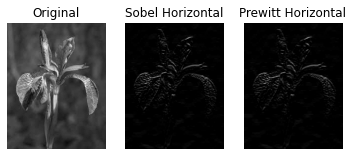

In [27]:
plt.subplot(1, 3, 1)
plt.imshow(iris_gray, cmap="gray")
plt.title("Original")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(iris_sobel_h, cmap="gray")
plt.title("Sobel Horizontal")
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(iris_prewitt_h, cmap="gray")
plt.title("Prewitt Horizontal")
plt.axis("off")
plt.show()

### Vertical Edge

In [28]:
iris_sobel_v = util.img_as_ubyte(filters.sobel_v(iris_gray))
iris_prewitt_v = util.img_as_ubyte(filters.prewitt_v(iris_gray))

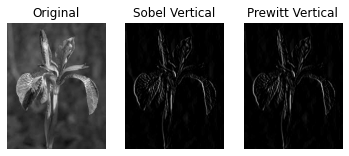

In [29]:
plt.subplot(1, 3, 1)
plt.imshow(iris_gray, cmap="gray")
plt.title("Original")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(iris_sobel_v, cmap="gray")
plt.title("Sobel Vertical")
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(iris_prewitt_v, cmap="gray")
plt.title("Prewitt Vertical")
plt.axis("off")
plt.show()

### Keseluruhan

In [32]:
iris_sobel = np.add(iris_sobel_v, iris_sobel_h, dtype="int16")
iris_prewitt = np.add(iris_prewitt_v, iris_prewitt_h, dtype="int16")

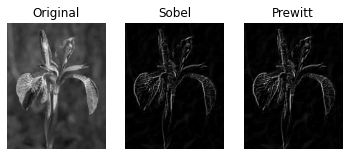

In [40]:
plt.subplot(1, 3, 1)
plt.imshow(iris_gray, cmap="gray")
plt.title("Original")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(iris_sobel, cmap="gray")
plt.title("Sobel")
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(iris_prewitt, cmap="gray")
plt.title("Prewitt")
plt.axis("off")
plt.show()

## Starfish

In [42]:
starfish = io.imread(os.path.join(STATIC, "starfish.png"))

### Median Filter

In [44]:
starfish_med = filters.rank.median(starfish, selem=morphology.square(9))

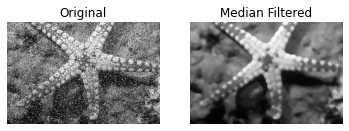

In [48]:
plt.subplot(1, 2, 1)
plt.imshow(starfish, cmap="gray")
plt.title("Original")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(starfish_med, cmap="gray")
plt.title("Median Filtered")
plt.axis("off")
plt.show()

### Mean Filter

In [47]:
starfish_mean = filters.rank.mean(starfish, selem=morphology.square(9))

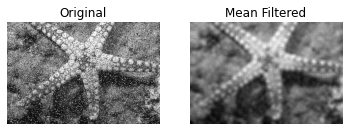

In [49]:
plt.subplot(1, 2, 1)
plt.imshow(starfish, cmap="gray")
plt.title("Original")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(starfish_mean, cmap="gray")
plt.title("Mean Filtered")
plt.axis("off")
plt.show()

### Analisis

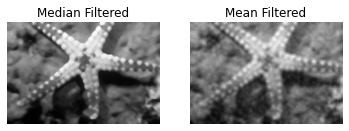

In [50]:
plt.subplot(1, 2, 1)
plt.imshow(starfish_med, cmap="gray")
plt.title("Median Filtered")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(starfish_mean, cmap="gray")
plt.title("Mean Filtered")
plt.axis("off")
plt.show()

Dilihat kedua gambar diatas sekilas, jelas bahwa median filter menghasilkan gambar yang lebih jelas dibandingkan mean filter. Edges yang dihasilkan mean filter terlihat blurry, sedangkan median filter menghasilkan edges yang lebih jelas.

Hal hal ini dikarenakan cara mean filter bekerja, dimana dia akan menghitung average value dari neighboring pixels. Karena sifat dari noise yang di apply adalah salt and pepper dimana banyak pixel yang mempunyai intensitas 0 atau 255 (maksimal), hasil dari average nya akan skewed dan menurunkan contrast nya sehingga edges nya jadi tidak jelas.

Dilain sisi, median filter mengambil nilai tengah (setelah di urutkan berdasarkan intensitas) dari neighboring pixels. Karena noise nya selalu 0 atau 255, noise tidak akan pernah di ambil atau mempengaruhi hasil dari smoothing nya.